# Mass shooting in USA - Historical data

## Importing dataset and pandas

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics

file_name = 'mass_shooting.csv'
data = pd.read_csv(file_name)

### Dataset registration quantity

In [3]:
data.count()

Date           2712
City           2712
State          2712
Dead           2712
Injured        2712
Total          2712
Description    2712
dtype: int64

### Counting death incidents (percentage)

In [4]:
data['Dead'].value_counts() * 100 / data['Dead'].count()

0     43.104720
1     28.355457
2     11.873156
3      5.752212
4      4.092920
5      2.323009
6      1.438053
7      0.884956
8      0.516224
10     0.331858
9      0.331858
13     0.184366
11     0.110619
22     0.073746
17     0.073746
14     0.073746
15     0.073746
23     0.036873
27     0.036873
61     0.036873
50     0.036873
16     0.036873
28     0.036873
12     0.036873
33     0.036873
24     0.036873
43     0.036873
20     0.036873
Name: Dead, dtype: float64

### State presence in our dataset

In [5]:
data['State'].value_counts() * 100 / data['State'].count()

Illinois                          10.103245
California                         8.185841
Texas                              7.558997
Florida                            5.051622
Pennsylvania                       4.646018
New York                           4.646018
Louisiana                          4.461652
Ohio                               3.650442
Michigan                           3.392330
Georgia                            3.392330
North Carolina                     3.244838
Missouri                           2.949853
Maryl                              2.839233
Tennessee                          2.691740
South Carolina                     2.691740
Alabama                            2.581121
Virginia                           2.175516
Indiana                            2.028024
New Jersey                         1.991150
Mississippi                        1.917404
Colorado                           1.880531
Wisconsin                          1.548673
Washington                      

### Plotting death counts

<AxesSubplot:>

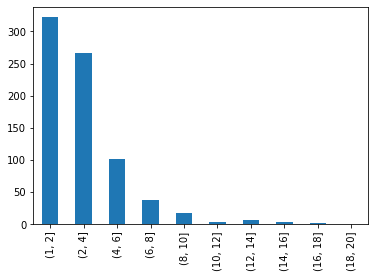

In [6]:
death_bins = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
data['DeathBin']=pd.cut(data['Dead'], death_bins)
data['DeathBin'].value_counts().sort_index().plot(kind='bar')

## Plotting death per year

#### Formatting date

In [7]:
data['Date']=pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Year']=pd.DatetimeIndex(data['Date']).year
data['Month']=pd.DatetimeIndex(data['Date']).month
data['Year']

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
2707    1933
2708    1929
2709    1929
2710    1927
2711    1924
Name: Year, Length: 2712, dtype: int64

### (Between 1990 - 2000)

<AxesSubplot:>

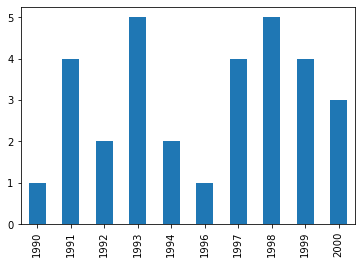

In [8]:
data[(data['Dead']>0) & (data['Year']<=2000) & (data['Year']>=1990)]['Year'].value_counts().sort_index().plot(
    kind='bar'
)

### (Between 2000 - 2022)

<AxesSubplot:>

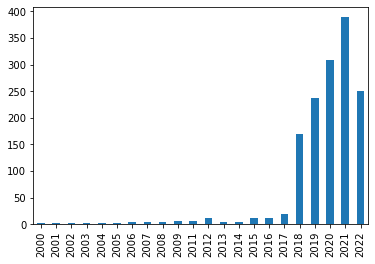

In [9]:
data[(data['Dead']>0) & (data['Year']>=2000)]['Year'].value_counts().sort_index().plot(kind='bar')

## Splitting data

#### Reshaping data to fit
#### data.Dead will no longer be of type series
#### For training, we need 2D array types

In [10]:
x = np.array([data.Dead])
x = x.reshape(-1,1)
y = data.Year

print(x.shape)
print(y.shape)

(2712, 1)
(2712,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state = 0
)

### Generating model

In [12]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Evaluating the model (Accuracy)

In [13]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2727272727272727


### Evaluating the model (Precision)

In [14]:
print('Precision:', metrics.precision_score(y_test, y_pred,
                                          pos_label='positive',
                                         average='macro'))

Precision: 0.006834975369458128


/home/luis/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/home/luis/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Evaluating the model (Recall)

In [15]:
print('Recall:', metrics.recall_score(y_test, y_pred,
                                          pos_label='positive',
                                         average='macro'))

Recall: 0.025


/home/luis/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
